## SOAR noise on the CPU

In [10]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
from netCDF4 import Dataset
import datetime
from IPython.display import display

#For plotting
import matplotlib
from matplotlib import pyplot as plt

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

Starting with random noise

In [11]:
xi = np.random.normal(size=(50, 100))

Define SOAR distance kernel

In [12]:
def SOAR_Q(a_x, a_y, b_x, b_y, dx, dy, q0, L):
    dist = np.sqrt( dx*dx*(a_x - b_x)**2  +  dy*dy*(a_y - b_y)**2)
    return q0*(1.0 + dist/L)*np.exp(-dist/L)

In [13]:
ny = 50
nx = 100

dx = 800*5
dy = 800*5

q0 = 0.1
L = 2500*5

cutoff = 10

dist_ref = np.zeros((2*cutoff+1, 2*cutoff+1))
for a_y in range(2*cutoff+1):
    for a_x in range(2*cutoff+1):
        dist_ref[a_y, a_x] = SOAR_Q(a_x, a_y, cutoff, cutoff, dx, dy, q0, L)

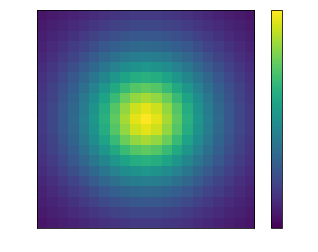

In [14]:
plt.imshow(dist_ref, vmin=0)
plt.colorbar()

Smooth random field

In [15]:
Qxi = np.zeros_like(xi)
loop = 0
for b_y in range(-cutoff, cutoff+1):
    for b_x in range(-cutoff, cutoff+1):
        if b_y >= 0 and b_x >= 0:
            Qxi[b_y:, b_x:] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[b_y:, b_x:] 
        if b_y < 0 and b_x >= 0:
            Qxi[:b_y, b_x:] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[:b_y, b_x:]
        if b_y >= 0 and b_x < 0:
            Qxi[b_y:, :b_x] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[b_y:, :b_x]
        if b_y < 0 and b_x < 0:
            Qxi[:b_y, :b_x] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[:b_y, :b_x]
        

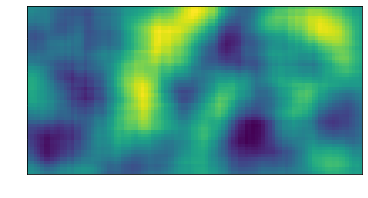

In [16]:
plt.imshow(Qxi)

Collected in function

In [17]:
def SOARpert(xi, dx, dy, L, q0, cutoff):
    ny, nx = xi.shape

    dist_ref = np.zeros((2*cutoff+1, 2*cutoff+1))
    for a_y in range(2*cutoff+1):
        for a_x in range(2*cutoff+1):
            dist_ref[a_y, a_x] = SOAR_Q(a_x, a_y, cutoff, cutoff, dx, dy, q0, L)


    Qxi = np.zeros_like(xi)
    for b_y in range(-cutoff, cutoff+1):
        for b_x in range(-cutoff, cutoff+1):
            if b_y >= 0 and b_x >= 0:
                Qxi[b_y:, b_x:] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[b_y:, b_x:] 
            if b_y < 0 and b_x >= 0:
                Qxi[:b_y, b_x:] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[:b_y, b_x:]
            if b_y >= 0 and b_x < 0:
                Qxi[b_y:, :b_x] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[b_y:, :b_x]
            if b_y < 0 and b_x < 0:
                Qxi[:b_y, :b_x] += dist_ref[cutoff+b_y, cutoff+b_x] * np.roll(np.roll(xi,b_y, axis=0),b_x,axis=1)[:b_y, :b_x]
        
    return Qxi



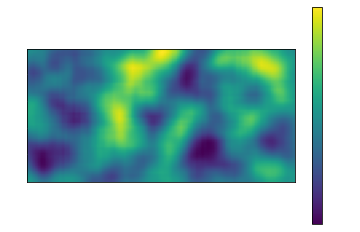

In [18]:
Qxi = SOARpert(xi, 4000, 4000, 10000, 0.1, 10)

plt.imshow(Qxi)
plt.colorbar()